#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

### Short-haul:  Flights lasting anywhere from 30 minutes to 3 hours. (air_time <=180mins)
### Medium-haul:  Flights lasting between 3-6 hours.  (180mins <= air_time <= 360mins )
### Long-haul flights:  Flights that extend beyond 6 hours. (air_time >= 360 mins)
### Source : https://www.themcggroup.com/blog/the-differences-between-longhaul-and-shorthaul-piloting/bp67/

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
flights_haul = pd.read_csv("/Users/vickichen/Desktop/flight/midterm-project/data/flights_without_outlier.csv")


In [81]:
    
flights_haul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168925 entries, 0 to 168924
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              168925 non-null  object 
 1   mkt_unique_carrier   168925 non-null  object 
 2   op_unique_carrier    168925 non-null  object 
 3   op_carrier_fl_num    168925 non-null  int64  
 4   origin               168925 non-null  object 
 5   origin_city_name     168925 non-null  object 
 6   dest                 168925 non-null  object 
 7   dest_city_name       168925 non-null  object 
 8   crs_dep_time         168925 non-null  int64  
 9   dep_time             168925 non-null  int64  
 10  dep_delay            168925 non-null  float64
 11  taxi_out             168925 non-null  float64
 12  taxi_in              168925 non-null  float64
 13  crs_arr_time         168925 non-null  int64  
 14  arr_time             168925 non-null  int64  
 15  arr_delay        

In [82]:
   df_new = flights_haul['dep_time']
   df_new

0         1303
1         1833
2         1353
3         1533
4          713
          ... 
168920    1152
168921    1730
168922    1726
168923     836
168924     807
Name: dep_time, Length: 168925, dtype: int64

In [83]:
short_hual = flights_haul.loc[flights_haul['air_time']<=180]
short_hual = short_hual[short_hual['dep_time']!=2400]
medium_hual = flights_haul.loc[(flights_haul['air_time'] >= 180) & flights_haul['air_time'] <= 360]
medium_hual = medium_hual[medium_hual['dep_time'] !=2400]
long_hual = flights_haul.loc[flights_haul['air_time']>=360]


In [84]:

short_hual['dep_time1']=short_hual['dep_time'].apply(lambda x: int(x/100))
short_flights_time=short_hual.groupby(by=short_hual['dep_time1'])['taxi_out'].count().sort_values(ascending= False)

medium_hual['dep_time2'] = medium_hual['dep_time'].apply(lambda x:int(x/100))
medium_flights_time = medium_hual.groupby(by=medium_hual['dep_time2'])['taxi_out'].count().sort_values(ascending= False)

long_hual['dep_time3'] = long_hual['dep_time'].apply(lambda x:int(x/100))
long_flights_time = long_hual.groupby(by=long_hual['dep_time3'])['taxi_out'].count().sort_values(ascending= False)



/var/folders/fz/ntgp3y9j3p777vzmhx_1fmwr0000gn/T/ipykernel_16918/1615770890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_hual['dep_time3'] = long_hual['dep_time'].apply(lambda x:int(x/100))


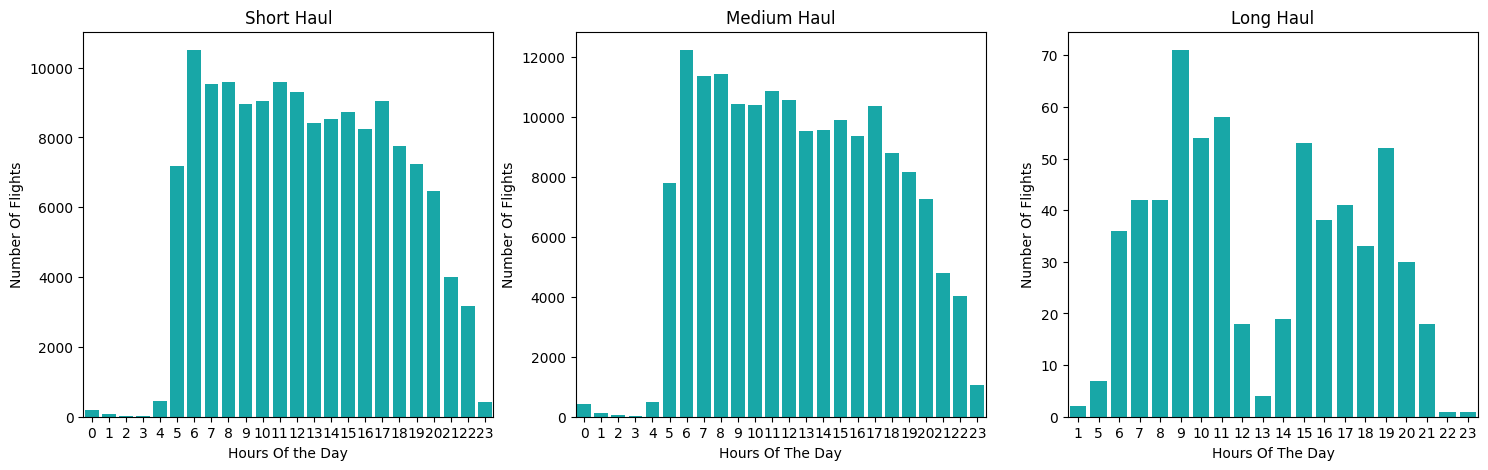

In [86]:
#plotting each flight
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


#Short Haul
sns.barplot(ax=axes[0], x=short_flights_time.index, y=short_flights_time.values,color='c')
axes[0].set_title('Short Haul')
axes[0].set_xlabel('Hours Of the Day')
axes[0].set_ylabel('Number Of Flights')
#Medium Flights
sns.barplot(ax=axes[1], x=medium_flights_time.index, y=medium_flights_time.values,color='c')
axes[1].set_title('Medium Haul')
axes[1].set_xlabel('Hours Of The Day')
axes[1].set_ylabel('Number Of Flights')

sns.barplot(ax=axes[2],x=long_flights_time.index, y=long_flights_time.values,color='c')
axes[2].set_title('Long Haul')
axes[2].set_xlabel('Hours Of The Day')
axes[2].set_ylabel('Number Of Flights')
plt.show()